In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from time import time
import copy as copy

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier, OutputCodeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors.kde import KernelDensity

%matplotlib inline

# Working with data

In [3]:
data = pd.read_csv(open("dataset_diabetes/diabetic_data.csv"))
print('Columns\n', data.columns)
data.drop('weight', axis=1, inplace=True)
data.drop('payer_code', axis=1, inplace=True)
data.drop('medical_specialty', axis=1, inplace=True)
n_samples = data.shape[0]

Columns
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [4]:
print ('Number of samples', n_samples)

Number of samples 101766


In [5]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Encoding of categorical features

In [6]:
LE = LabelEncoder()

In [7]:
# Transform the categorical features

s = 1
for column in data.columns[:-1]:
    LE.fit(data[column])
    data[column] = s * LE.transform(data[column])

#### All data and relevant medical data

In [8]:
med_col = data.columns[9:-1]
drug_col = data.columns[21:-3]
X_med = np.asarray(data[med_col])
X_drug = np.asarray(data[drug_col])

LE.fit(data['readmitted'])
data['readmitted'] = LE.transform(data['readmitted'])
print ('Label encoding for readmitted', LE.classes_)

X, y = np.asarray(data[data.columns[2:-1]]), np.asarray(data['readmitted'])

Label encoding for readmitted ['<30' '>30' 'NO']


### Data split

In [9]:
X_train_med, X_test_med, y_train, y_test = train_test_split(X_med, y, 
                                                                    test_size=0.5, random_state=1, stratify=y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [11]:
X_train_drug, X_test_drug, y_train, y_test = train_test_split(X_drug, y, 
                                                                    test_size=0.5, random_state=1, stratify=y)

In [12]:
X_samp, X_remain, y_samp, y_remain = train_test_split(X, y, test_size=0.99, random_state=1, stratify=y)

### Label binarization
Here we use binariztion to predict readmission in any time 

In [13]:
# LE.fit(data['readmitted'])
# data['readmitted'] = LE.transform(data['readmitted'])
# print ('Label encoding for readmitted', LE.classes_)

In [14]:
def binarization (y, y_train, y_test, param=2):
    
    y_bin = np.zeros(len(y))
    y_bin_train = np.zeros(len(y_train))
    y_bin_test = np.zeros(len(y_test))

    for i in range(len(y)):
        if y[i] < param:
            y_bin[i] = 1
        else:
            y_bin[i] = 0
    
    for i in range(len(y_train)):
        if y_train[i] < param:
            y_bin_train[i] = 1
        else:
            y_bin_train[i] = 0

    for i in range(len(y_test)):
        if y_test[i] < param:
            y_bin_test[i] = 1
        else:
            y_bin_test[i] = 0

    return y_bin, y_bin_train, y_bin_test

In [15]:
y_bin, y_bin_train, y_bin_test = binarization(y, y_train, y_test, param=1)

--------------------------------------------------------------------------

## Emergency visits

In [22]:
#Number of emergency visits of the patient in the year preceding the encounter

n_emergency = np.asarray(data['number_emergency'])
emergency_values = np.unique(n_emergency)

In [23]:
#Age intervals, for example [10, 20)

ages = np.asarray(data["age"])
ages_types = np.unique(ages)

In [24]:
probability = []
for age in ages_types:
    emergency = n_emergency[np.where(ages == age)]
    probability.append(emergency.sum() / len(emergency))
    print(age, emergency.sum() / len(emergency))

0 0.0310559006211
1 0.156295224313
2 0.578153289077
3 0.482119205298
4 0.35446566856
5 0.222183588317
6 0.155628697238
7 0.131003529231
8 0.144269349305
9 0.13104189044


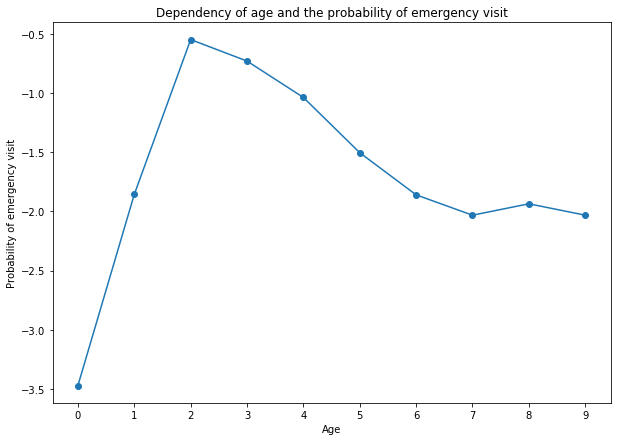

In [25]:
fig = plt.figure(figsize=(10,7))
plt.plot(np.arange(len(ages_types)), np.log(probability), marker='o')
plt.xticks(np.arange(len(ages_types)), ages_types)
plt.title("Dependency of age and the probability of emergency visit")
plt.xlabel("Age")
plt.ylabel("Probability of emergency visit")

-------------------

# Visualization

### PCA to visualize

In [36]:
n_components = 2

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_samp)
print("PCA is done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X_samp)
# X_test_pca = pca.transform(X_test)
print("Transformation is done in %0.3fs" % (time() - t0))

PCA is done in 0.342s
Transformation is done in 0.343s


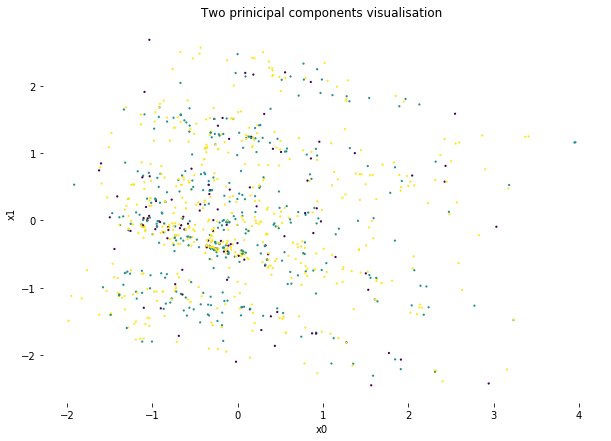

In [38]:
x0 = [x[0] for x in X_train_pca]
x1 = [x[1] for x in X_train_pca]
# colors = [cm.Vega10((y_) / max(y_train)) for y_ in y_bin_train]
plt.figure(figsize=(10, 7))
ax = plt.axes(frameon=False)
plt.scatter(x0, x1, c=y_samp, edgecolor = 'none', s = 5)
plt.xlabel('x0')
plt.ylabel('x1')
# ax.set_xlim([-2e14, 2e14])
# ax.set_ylim([-0.25e14, 0.25e14])
plt.title('Two prinicipal components visualisation')

### KernelPCA

In [39]:
n_components = 3

t0 = time()
kpca = KernelPCA(n_components=n_components, kernel='cosine').fit(X_samp)
print("KernelPCA is done in %0.3fs" % (time() - t0))

X_train_kpca = kpca.transform(X_samp)
# X_test_kpca = kpca.transform(X_test_med)
print("Transformation is done in %0.3fs" % (time() - t0))

KernelPCA is done in 0.057s
Transformation is done in 0.092s


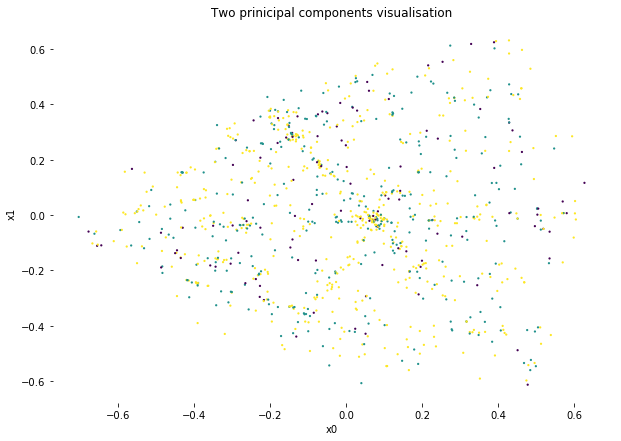

In [41]:
x0 = [x[0] for x in X_train_kpca]
x1 = [x[1] for x in X_train_kpca]
# colors = [cm.Vega10((y_) / max(y_train)) for y_ in y_bin_train]
plt.figure(figsize=(10, 7))
ax = plt.axes(frameon=False)
plt.scatter(x0, x1, c=y_samp, edgecolor = 'none', s = 5)
plt.xlabel('x0')
plt.ylabel('x1')
# ax.set_xlim([-2e14, 2e14])
# ax.set_ylim([-0.25e14, 0.25e14])
plt.title('Two prinicipal components visualisation')

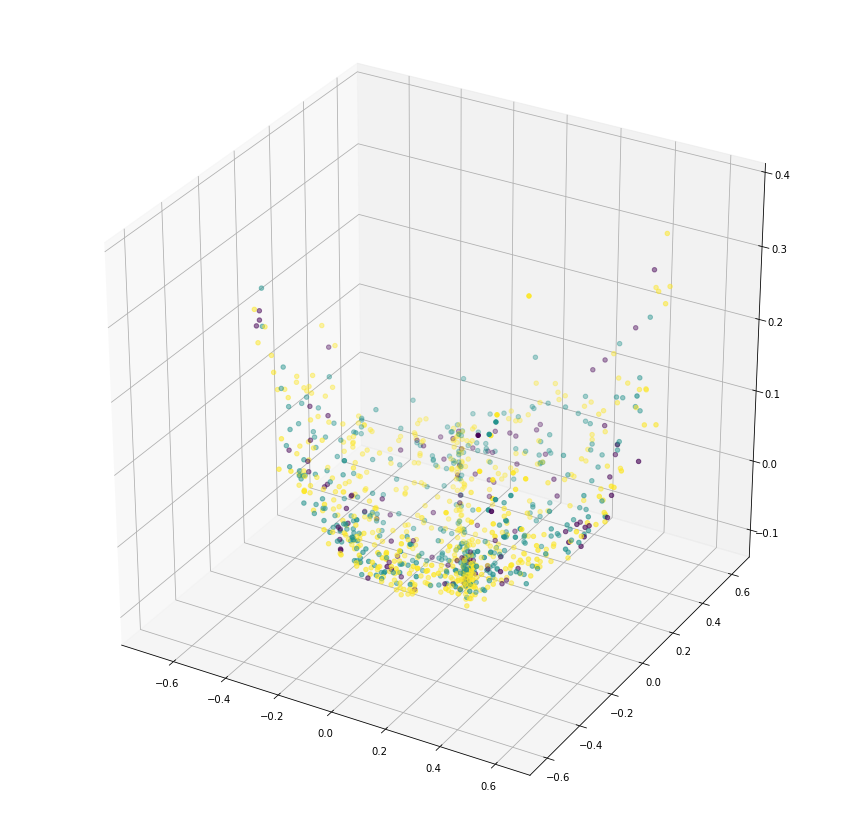

In [44]:
# colors = [cm.Vega10((y_) / max(y_train)) for y_ in y_train]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], X_train_kpca[:, 2], c=y_samp)
plt.show()

### t-SNE

In [18]:
X_tsne2D = np.loadtxt('X_tsne2.txt') # tsne of all data
X_tsne3D = np.loadtxt('X_train_tsne.txt') # tsne of the half of data

In [99]:
colors = data['age']

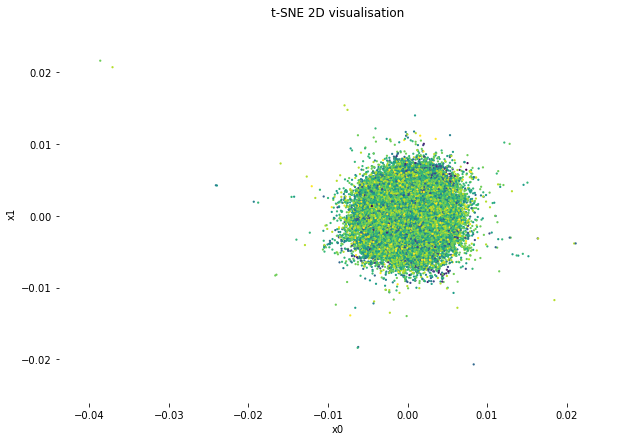

In [100]:
x0 = [x[0] for x in X_tsne2D]
x1 = [x[1] for x in X_tsne2D]
# colors = [cm.Vega10((y_) / max(y_train)) for y_ in y_bin_train]
plt.figure(figsize=(10, 7))
ax = plt.axes(frameon=False)
plt.scatter(x0, x1, c=colors, edgecolor = 'none', s = 5)
plt.xlabel('x0')
plt.ylabel('x1')
# ax.set_xlim([-2e14, 2e14])
# ax.set_ylim([-0.25e14, 0.25e14])
plt.title('t-SNE 2D visualisation')

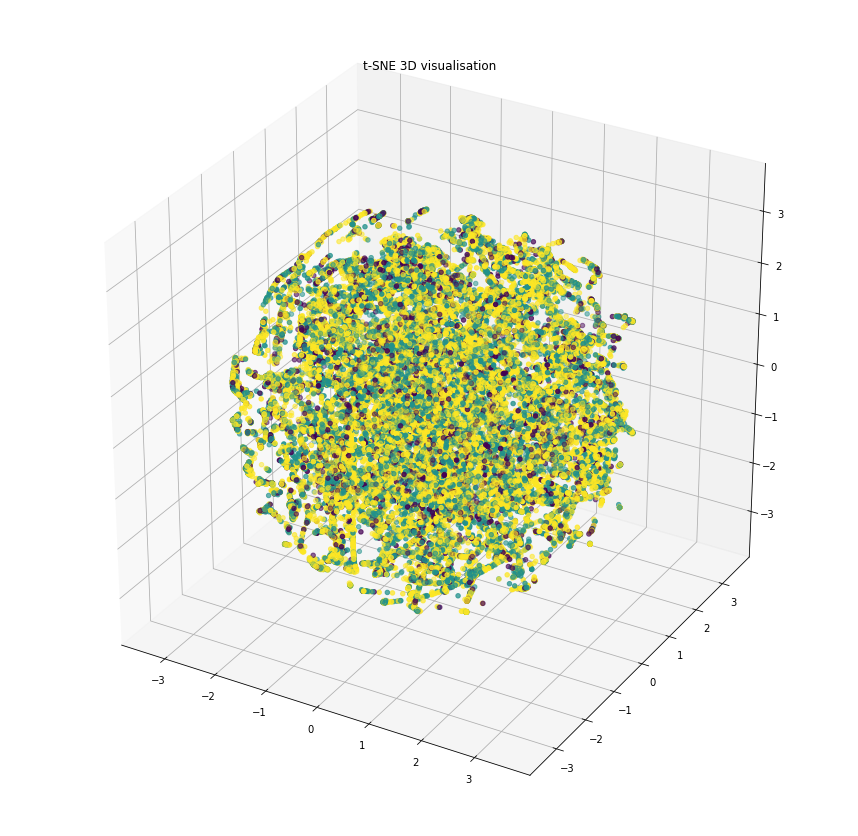

In [56]:
# colors = [cm.Vega10((y_) / max(y_train)) for y_ in y_train]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('t-SNE 3D visualisation')
ax.scatter(X_tsne3D[:, 0], X_tsne3D[:, 1], X_tsne3D[:, 2], c=y_train)
plt.show()

-------

# KDE

In [19]:
# Divide tha data with respect to labels

X0 = X_tsne2D[np.where(y == 0)[0]] 
X1 = X_tsne2D[np.where(y == 1)[0]]
X2 = X_tsne2D[np.where(y == 2)[0]]

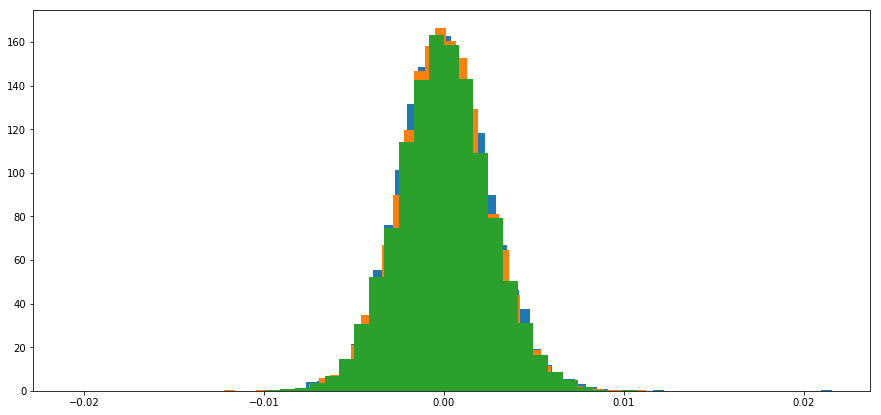

In [20]:
plt.figure(figsize=(15,7))
plt.hist(X0[:, 1], normed=True, bins=50)
plt.hist(X1[:, 1], normed=True, bins=50)
plt.hist(X2[:, 1], normed=True, bins=50)
plt.show()

In [107]:
X_plot = np.linspace(-10, 10, X1.shape[0]).reshape(-1,1)

In [21]:
# kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X1)
# log_dens = kde.score_samples(X_plot)
# ax[0, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
# ax[0, 1].text(0.5, 0.23, "Gaussian Kernel Density")
# ax[0, 1].hist(glass[:, 0], normed=True, alpha=.2, color='green')

--------

# Classification
## Binary classification

### AdaBoost with random under-sampling

We have an imbalanced data, so we want to use RUS

In [23]:
rus = RandomUnderSampler()
X_train_med_rus, y_bin_train_rus = rus.fit_sample(X_train_med, y_bin_train)
X_test_med_rus, y_bin_test_rus = rus.fit_sample(X_test_med, y_bin_test)


In [24]:
AB = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200)
print('Fitting classifier')
t0 = time()
AB.fit(X_train_med_rus, y_bin_train_rus)
print('fitting is done in %s ' % (time() - t0))
print('Accuracy', accuracy_score(y_pred=AB.predict(X_test_med_rus), y_true=y_bin_test_rus))

Fitting classifier
fitting is done in 8.96828293800354 
Accuracy 0.592197957027


In [25]:
y_pred_proba = AB.predict_proba(X_test_med_rus)[:, 0]
precision_AB_rus, recall_AB_rus, _ = precision_recall_curve(y_true=y_bin_test_rus, probas_pred=y_pred_proba)

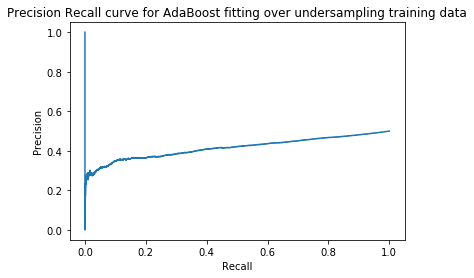

In [26]:
plt.title('Precision Recall curve for AdaBoost fitting over undersampling training data')
plt.plot(recall_AB_rus, precision_AB_rus)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### AdaBoost without RUS

In [101]:
AB = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200)

In [104]:
print('Fitting classifier')
t0 = time()
AB.fit(X_train_med, y_bin_train)
print('fitting is done in %s ' % (time() - t0))
print('Accuracy', accuracy_score(y_pred=AB.predict(X_test_med), y_true=y_bin_test))

Fitting classifier
fitting is done in 18.437300205230713 
Accuracy 0.616213560432


In [105]:
y_pred_proba = AB.predict_proba(X_test_med)[:, 0]

In [107]:
precision_AB, recall_AB, _ = precision_recall_curve(y_true=y_bin_test, probas_pred=y_pred_proba)

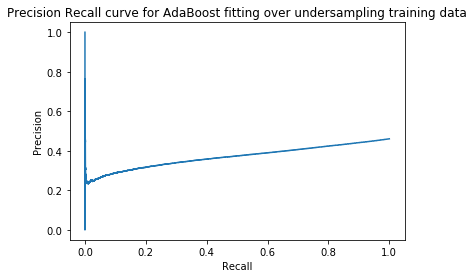

In [108]:
plt.title('Precision Recall curve for AdaBoost fitting over undersampling training data')
plt.plot(recall_AB, precision_AB)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### MLPClassifier

In [287]:
mlp = MLPClassifier(hidden_layer_sizes=(35, 35, 35, 35, 35), max_iter=1000, activation='logistic')

In [289]:
print('Fitting classifier')
t0 = time()
mlp.fit(X_train_med, y_bin_train)
print('fitting is done in %s ' % (time() - t0))

Fitting classifier
fitting is done in 13.36445164680481 


In [291]:
print('Accuracy', list(mlp.predict(X_test_med) == y_bin_test).count(True) / len(y_bin_test))

Accuracy 0.5390586616881202


In [292]:
# print ('Number of ones in test prediction', np.sum(mlp.predict(X_test_med)))
# print ('Number of ones in y_test', np.sum(y_bin_test))

### Naive Bayes

In [121]:
NB = BernoulliNB()

In [122]:
print('Fitting classifier')
t0 = time()
NB.fit(X_train_med_rus, y_bin_train_rus)
print('fitting is done in %s ' % (time() - t0))

Fitting classifier
fitting is done in 0.01502084732055664 


In [124]:
print ('Accuracy', accuracy_score(y_pred=NB.predict(X_test_med), y_true=y_bin_test))

Accuracy 0.609073042909


### Discriminant Analysis

In [296]:
QDA = QuadraticDiscriminantAnalysis()
LDA = LinearDiscriminantAnalysis()

In [297]:
QDA.fit(X_train, y_bin_train)
LDA.fit(X_train, y_bin_train)

//anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
//anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [300]:
print ('QDA accuracy', accuracy_score(y_pred=QDA.predict(X_test), y_true=y_bin_test))
print ('LDA accuracy', accuracy_score(y_pred=LDA.predict(X_test), y_true=y_bin_test) )

QDA accuracy 0.608529036062
LDA accuracy 0.62159772035


In [ ]:
# list(QDA.predict(X_test_med)).count(0)

In [ ]:
# list(LDA.predict(X_test_med)).count(0)

In [ ]:
# list(y_bin_test_med).count(0)

## Multiclass classification

### Random forest classifier

In [293]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
t0 = time()
print("Fitting in forest..")
forest.fit(X_train, y_train)
print("Done in %s seconds" %(time() - t0))

Fitting in forest..
Done in 19.139636039733887 seconds


In [295]:
list(forest.predict(X_test) == y_test).count(True) / len(y_test)

0.5915299204087648

In [ ]:
plt.plot(range(X_train_med.shape[1]), forest.feature_importances_)

In [285]:
np.argmax(forest.feature_importances_)

0

In [286]:
data.columns[9]

'num_lab_procedures'

Choosing the best parameter via grid search

In [302]:
print("Fitting the classifier to the training set..")
t0 = time()
param_grid = {'n_estimators': np.arange(5, 150, 10)}
forest = GridSearchCV(RandomForestClassifier(random_state=1), param_grid)
forest.fit(X_train_med, y_bin_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(forest.best_estimator_)

Fitting the classifier to the training set..
done in 517.403s
Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=135, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)


In [305]:
print ('Accuracy', list(forest.best_estimator_.predict(X_test_med) == y_bin_test).count(True) / len(y_bin_test))

Accuracy 0.6201238085879925


-----

### OneVsRestClassifier

In [167]:
OVR = OneVsRestClassifier(estimator=LogisticRegression())

In [174]:
print('Fitting classifier')
t0 = time()
OVR.fit(X_train, y_train)
print('Fitting is done in %0.3fs' % (time() - t0))

Fitting classifier
Fitting is done in 9.004s


In [175]:
y_pred = OVR.predict(X_test)

In [177]:
print ('Accuracy', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy 0.578068192984


### OutoutCodeClassifier (without binarization)

In [133]:
OCC = OutputCodeClassifier(code_size=50, estimator=LogisticRegression())

In [9]:
OCC.fit(X_train, y_train)

OutputCodeClassifier(code_size=50,
           estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
           n_jobs=1, random_state=None)

In [10]:
list(OCC.predict(X_test) == y_test).count(True) / len(y_test)

0.5700332134504648

## Precision-Recall curves

In [16]:
def plot_pr_curve(methods, methods_labels, y=y, y_train=y_train, y_test=y_test, X_train=X_train_med, X_test=X_test_med, param=2):
    plt.figure(figsize=(15,10))
    #if we consider two cases <30 and (>30 and No readmittion), we do random undersampling
    if param != 2:
        y_bin, y_bin_train, y_bin_test = binarization(y, y_train, y_test, param=1)
        rus = RandomUnderSampler()
        X_train, y_bin_train = rus.fit_sample(X_train, y_bin_train)
        plt.title('Precision Recall curves with case of readmission within 30 days')
    else:
        y_bin, y_bin_train, y_bin_test = binarization(y, y_train, y_test, param=2)
        plt.title('Precision Recall curves with case of readmission')
        
    for i in range(len(methods)):
        print('Fitting %s classifier..' %i)
        t0 = time()
        methods[i].fit(X_train, y_bin_train)
        y_pred_proba = methods[i].predict_proba(X_test)[:, 0]
        print('fitting is done in %s ' % (time() - t0))
        precision, recall, _ = precision_recall_curve(y_true=y_bin_test, probas_pred=y_pred_proba)
        plt.plot(recall, precision, label=methods_labels[i])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
    plt.legend()
    plt.show()

Fitting 0 classifier..
fitting is done in 53.36781120300293 
Fitting 1 classifier..
fitting is done in 8.253094911575317 
Fitting 2 classifier..
fitting is done in 0.1237940788269043 
Fitting 3 classifier..


//anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


fitting is done in 0.3308439254760742 
Fitting 4 classifier..


//anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


fitting is done in 0.768388032913208 


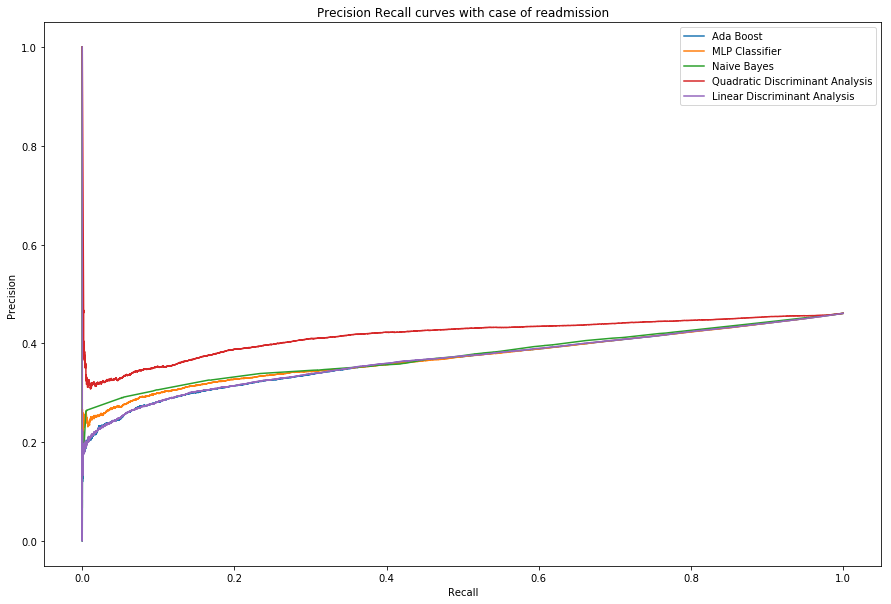

Fitting 0 classifier..
fitting is done in 12.225146055221558 
Fitting 1 classifier..
fitting is done in 3.572096824645996 
Fitting 2 classifier..
fitting is done in 0.07642984390258789 
Fitting 3 classifier..


//anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
//anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


fitting is done in 0.13815999031066895 
Fitting 4 classifier..
fitting is done in 0.0596928596496582 


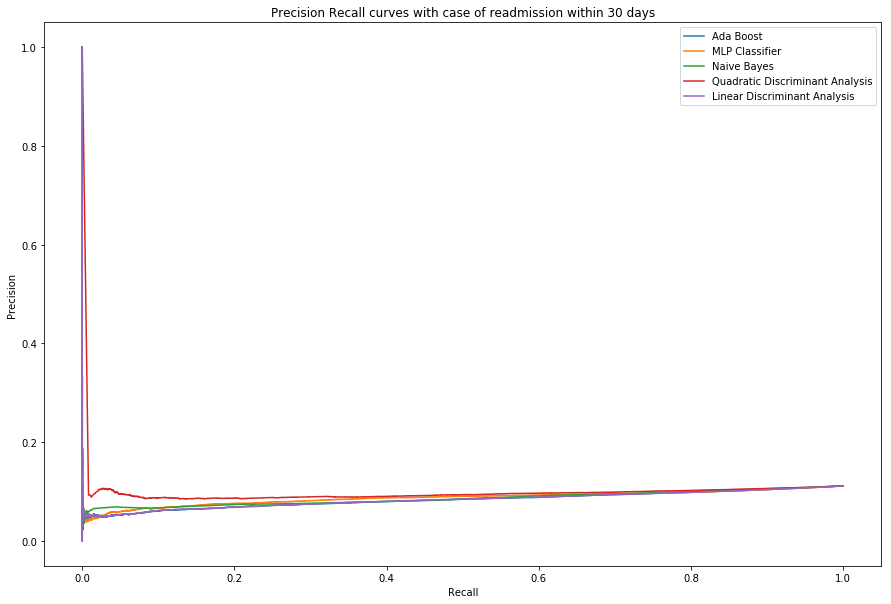

In [17]:
methods = [AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200),
          MLPClassifier(max_iter=1000, activation='logistic'),
          BernoulliNB(),
          QuadraticDiscriminantAnalysis(), 
          LinearDiscriminantAnalysis()]

methods_labels = ["Ada Boost", "MLP Classifier", "Naive Bayes", 
                  "Quadratic Discriminant Analysis", "Linear Discriminant Analysis"]

plot_pr_curve(methods, methods_labels)
plot_pr_curve(methods, methods_labels, param=1)